# Laboratorio 1: Inversión de Capital
### Alumno: Jesús Sebastián González Ortiz

### GitHub: https://github.com/SebasGlez2000/Laboratorio1


### 0. Librerías y dependencias:
- yfinance (yfinance se usa para la descarga de precios históricos de los activos) 
- pandas (pandas es la biblioteca para la manipulación de datos en DataFrames)
- numpy (numpy es para las operaciones y procesos numéricos)
- matplotlib.pyplot (matplotlib.pyplot  es la biblioteca para la graficación de datos)
- scipy.optimize (para usar la paquetería para minimizar funciones)
- NAFTRAC_holdings.zip (Desde NAFTRAC_20200131 hasta el NAFTRAC20220729)

In [12]:
import data as dt
import visualizations as vs


### 1. Introducción

Durante el curso hemos estado viendo las diferencias entre ambos sistemas de inversión como lo son la inversión activa y la inversión pasiva, primero veamos en qué consisten ambos tipos de inversiones, la inversión pasiva es el tipo de inversión que vamos a llamar más conservador, está planeada a que sea más a largo plazo y que vayan aumentando de valor los activos del portafolio, en este tipo de inversión no se quiere recurrir mucho a la compra/venta de títulos entonces esta un poco más planeado para mercados que no tengan tanta fluctuación de sus precios, es para empresas un poco más consolidadas y que no estén tan expuestas al riesgo. 

Por otro lado tenemos la inversión activa, al contrario de la pasiva, aquí si se busca ir modificando los pesos de los activos dentro del portafolio poninendo como punto de referencia alguna fecha específica, lo que busca el tipo de inversión activa es un poco más para mercados más volátiles de los cuales puedan cambiar pesos del portafolio constantemente para apostarle más a los activos que van teniendo un buen desemepeño y a los que van de bajada irles quitando importancia y vender títulos del portafolio.

Claramente existen inclinaciones dependiendo del tipo de inversor que sea la persona a si quieren una inversión pasiva que se evitan de tantas transacciones constantes para evitar costos extras en comisiones de títulos para mercados más consolidados y menos fluctuantes, pero probablemente tenga una rentabilidad menor. Y en la otra mano tenemos al inversor más especulante que está dispuesto a un poco más de riesgo por una mayor rentabilidad, pero también se arriesga a una mayor pérdida.

Cada tipo de inversión tiene sus pros y sus contras, pero siempre ha existido el mismo debate sobre ¿cuál tipo de inversión sería mejor?, no hay una manera a ciencia cierta de decir cuál es mejor que el otro, ambos son diferentes y acada uno tiene sus ventajas sobre el otro, lo que si es neceasario para llevar a cabo una inversión de un tipo es el manejo de un portafolio óptimo de pesos de los activos, aquí se distribuiría la cantandidad de capital que se le invertiría a cada activo midiendo sus rendimientos históricos anteriores, entre mejor desempeño histórico haya tenido, más peso se le otorgará a dicho activo, de igual manera se hará lo mismo con los diferentes activos que conformen el portafolio pero entre peor desempeño haya tenido va a tener menor relevancia dentro de la inversión.

Así que esto será lo que hagamos dentro del laboratorio, ambos tipos de inversión serán puestos a prueba con las mismas condiciones de plazos, capital, porcentaje de comision y activos. Se harán los cálculos necesarios para cada uno y se pondrán a prueba los rendimientos de ambos portafolios al final del plazo para saber cuál tuvo un mejor desempeño.

### 2. Objetivos

Se tiene un capital de 1,000,000 de pesos y se quiere buscar la mejor opción de inversión que está entre una inversión pasiva o activa, en la pasiva se invierte el capital en un ETF que replica al NAFTRAC, miesntras que la inversión activa busca crear un portafolio con los mismo activos que el ETF, pero se va haciendo un rebalanceo de pesos cada cierto tiempo.

### 3. Datos utilizados

- Pasiva:

Para la inversión pasiva se utilizó el primer archivo del año 2021 de los datos del NAFTRAC proporcionados por el profesor en archivo .csv, el NAFTRAC_20210129 nos proporcionó los datos sobre los tickers y pesos que se utilizarían para esta inversión, posteriormente se descargaron los precios históricos diarios de YahooFinance de dichos activos desde el 2021 hasta julio del 2022. Se hizo una limpieza de datos con las fechas requeridas para el ejercicio que empezaban el primer mes del año del 2021 y tomaban hasta julio del 2022. Una vez limpia la base de datos, en un DataFrame juntamos los tickers con sus respectivos pesos y los precios históricos mensuales al cierre que han tenido durante el periodo establecido. Algunos activos fueron removidos para cuestiones del laboratorio y al final tenemos una cantidad de 33 activos con sus respectivos pesos sacados de los archivos proporcionados por el profesor. Los pesos de los activos removidos se le añadieron al cash para el pago de las comisiones al momento de comprar títulos.

In [13]:
dt.precios_p.head()

Date,Pesos (%),2021-01-29 00:00:00,2021-02-26 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-30 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-26 00:00:00,2021-11-30 00:00:00,2021-12-31 00:00:00,2022-01-26 00:00:00,2022-02-28 00:00:00,2022-03-31 00:00:00,2022-04-29 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-29 00:00:00
AC.MX,1.77,86.565262,88.146454,93.801506,103.572945,107.946579,110.410324,115.032249,123.540764,121.680321,120.984344,126.407181,127.233490,120.497482,131.717651,131.844376,129.490005,133.789993,132.500000,141.210007
ALFAA.MX,1.51,12.846219,11.342515,11.750805,14.134883,13.945353,14.922925,15.122429,14.065057,14.274536,15.361834,15.292007,14.982777,14.543866,15.301983,15.110000,13.670000,15.120000,14.280000,14.010000
ALPEKA.MX,0.25,17.533739,18.844303,18.990564,22.466026,22.625360,24.407904,24.607071,23.581362,23.392155,23.103363,22.133537,22.213299,24.047791,26.261143,27.090000,27.549999,26.120001,27.790001,27.110001
ALSEA.MX,0.86,23.110001,25.440001,30.280001,32.950001,33.410000,35.470001,40.369999,39.259998,41.610001,45.430000,36.689999,37.950001,40.790001,44.360001,49.860001,44.730000,42.150002,38.080002,39.660000
AMXL.MX,13.70,13.036206,12.769190,13.312760,13.493952,14.857652,14.304543,16.108768,19.092947,17.634661,17.383566,18.364792,21.176628,19.341124,18.071894,20.620119,19.389942,20.317455,20.063608,18.940828


- Activa:

Para los datos utilizados en la inversión pasiva fue similar en cuestión de los tickers. Para la inversión activa lo primero que tenemos hacer es crear un portafolio eficiente, para esto se utilizaron los mismos activos que la inversión pasiva, pero en este caso utilizaremos un periodo diferente para los precios de los activos. Se usaron los datos históricos diarios descargados de YahooFinance desde enero del 2020 hasta enero del 2021, igual filtramos los datos para tener los precios al cierre mensuales de las fechas ya mencionadas para la creación del portafolio.

Una vez creado el portafolio eficiente añadimos los pesos al DataFrame con los tickers y precios mensuales de los activos para así poder después empezar con nuestra inversión activa.

In [14]:
dt.precios_act.tail(10)

Date,Pesos (%),2021-02-26 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-30 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-26 00:00:00,...,2022-03-31 00:00:00,2022-04-29 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-29 00:00:00,Posturas,Títulos,Compra títulos,Venta títulos,Precio periodo
LABB.MX,0.0000,18.952415,18.609304,18.275221,18.907270,18.573187,17.462587,17.543852,17.688320,17.200737,...,21.010841,20.664667,19.087652,20.129999,18.950001,0.000000,0.0,0.0,0.0,18.950001
LIVEPOLC-1.MX,0.0000,61.002586,69.761475,83.454704,82.023056,86.434883,91.645325,86.727066,83.152794,90.057846,...,100.422928,101.828415,103.870003,87.010002,91.480003,0.000000,0.0,0.0,0.0,91.480003
MEGACPO.MX,0.1675,66.363106,67.281754,68.080978,72.233788,67.123840,66.419685,66.543381,60.044151,59.254349,...,57.027672,55.314842,55.830002,48.869999,47.410000,105705.807690,2163.0,239.0,600.0,47.410000
OMAB.MX,0.0000,103.418274,109.519753,107.338219,109.127754,111.053650,103.835838,103.307495,103.162628,105.898064,...,142.769745,137.368988,142.289993,128.619995,124.169998,0.000000,0.0,0.0,0.0,124.169998
ORBIA.MX,0.0000,46.706005,52.239120,54.604061,54.517082,50.390369,52.922768,55.937172,52.076550,51.564739,...,52.194420,48.948105,52.686504,47.060001,44.959999,0.000000,0.0,0.0,0.0,44.959999
PE&OLES.MX,0.0597,287.015991,263.506958,260.748260,302.448792,275.031586,280.569000,284.457184,243.186447,298.780518,...,251.289993,224.710007,231.449997,186.199997,205.080002,34658.520309,169.0,37.0,76.0,205.080002
PINFRA.MX,0.0000,146.305099,148.663025,148.834152,151.829102,151.619934,142.749207,142.616104,138.216614,143.945053,...,154.763214,146.100861,132.753799,144.676788,144.411606,0.000000,0.0,0.0,0.0,144.411606
RA.MX,0.0000,81.763901,82.782288,88.814896,98.010918,106.901932,111.899139,112.601303,108.333618,105.716461,...,127.465256,123.129997,114.059998,95.089996,111.370003,0.000000,0.0,0.0,0.0,111.370003
TLEVISACPO.MX,0.0000,30.639521,35.806805,49.468109,52.424892,56.507889,53.435726,52.464531,45.111172,43.178684,...,46.340034,37.539791,40.279999,33.009998,32.139999,0.000000,0.0,0.0,0.0,32.139999
WALMEX.MX,0.3998,59.099838,63.843277,65.665390,64.764229,64.437439,64.982094,70.765320,69.448250,72.399284,...,81.919998,72.160004,72.769997,69.330002,73.839996,576985.731384,7814.0,2164.0,1115.0,73.839996


Lo esperado para el portafolio eficiente era que cada uno de los activos de nuestro portafolio tuviera un peso al menos para poder hacer más movimientos de posturas para el ejercicio, pero en nuestro caso el portafolio eficiente se dividió únicamente entre 7 activos, por lo tanto, estos 7 activos van a tener pesos muy significativos al momento de comprar títulos de ellos. El periodo de los precios seleccionados para el portafolio fue desde enero del 2020 hasta enero del 2022, dichos datos de igual manera si filtraron para tener los precios de cierre de mes cada mes por este periodo.

Una vez aplicando el ejericio de la inversión activa nos resultaron los DataFrames con la información requerida por el porfesor que fue la fecha, capital, rendimientos y rendimientos acumulados. Estos datos se obtuvieron directamente de la función que procesó nuestra anterior tabla para así obtener las operaciones históricas y las medidas de atribución al desempeño tanto de la inversión activa como de la pasiva.

### 4. Procesos

- Para la pasiva

Una vez teniendo nuestra base de datos limpia con los tickers, pesos y precios históricos, vemos las posturas que tenemos en el portafolio para la compra de títulos, después vamos monitoreando el proceso mensual que ha tenido nuestra inversión pasiva respecto al capital invertido en un inicio. En la siguiente tabla podremos observar el cómo ha cambiado nuestro capital, el rendimiento porcentual que ha tenido mes a mes y el rendimiento acumulado que se ha tenido.

In [15]:
dt.df_pasiva

,timestamp,Capital,Rend,Rend Acum
0,2021-01-29,969000.00,0.000000,0.000000
1,2021-02-26,1000795.52,3.281271,3.281271
2,2021-03-31,1060225.12,5.938236,9.219507
3,2021-04-30,1097749.41,3.539276,12.758783
4,2021-05-31,1173189.82,6.872280,19.631063
5,2021-06-30,1163199.63,-0.851541,18.779522
6,2021-07-30,1181997.60,1.616057,20.395579
7,2021-08-31,1239304.29,4.848292,25.243871
8,2021-09-30,1204692.73,-2.792822,22.451049
9,2021-10-26,1223275.31,1.542516,23.993565


Con estos resultados podemos concluir sobre la inversión pasiva que hemos obtenido muy buenos rendimientos al término de nuestro periodo que fue aproximadamente de un 21.47%. Se tuvieron meses con pérdidas pero en general tuvimos un buen rendimiento que sobrepasa esas pérdidas.

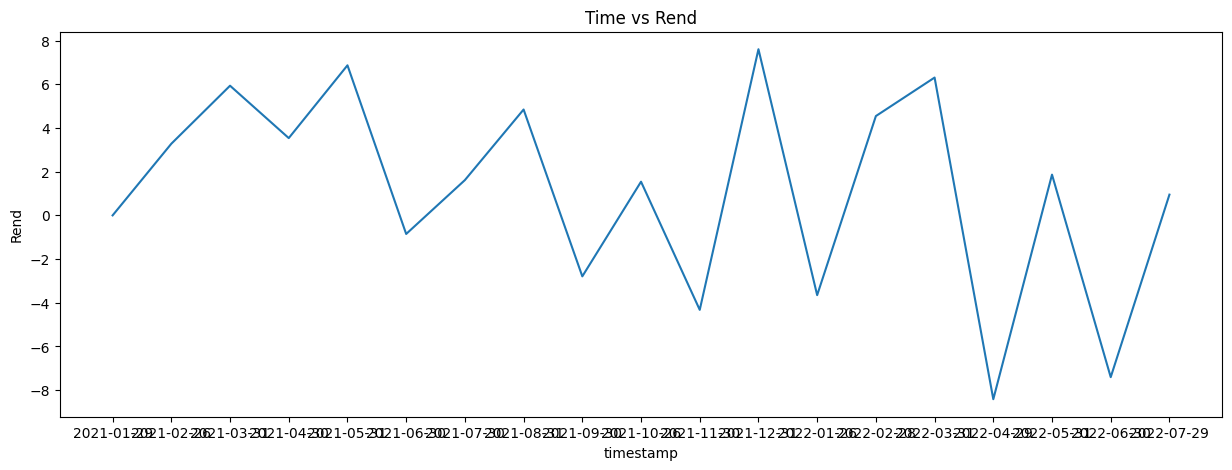

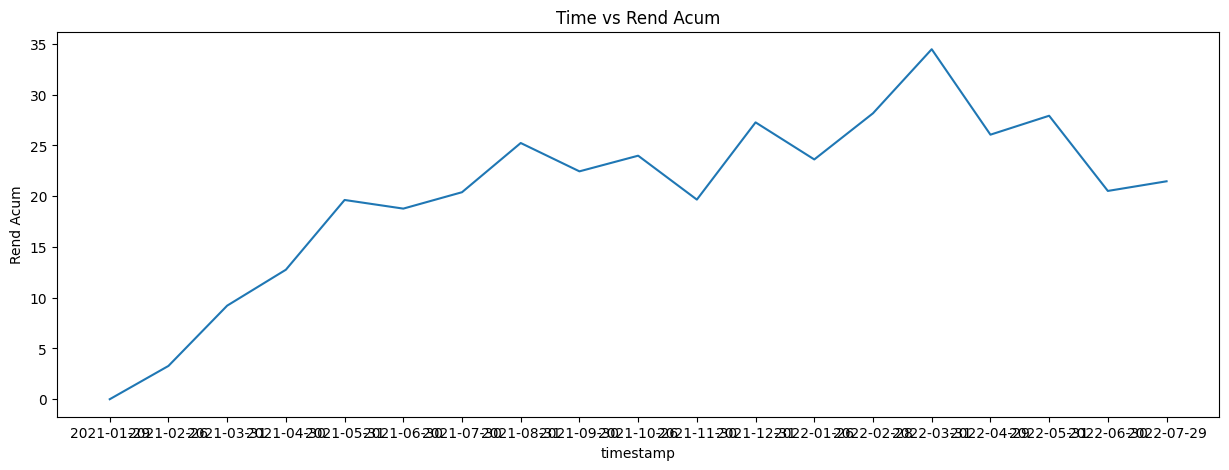

In [16]:
# Gráficas de rendimiento y rendimiento acumulado contra el tiempo.
vs.Rend1()
vs.Rend2()

Las gráficas anteriores muestran los rendimientos mensuales y acumulados contra el tiempo, se pueden observar las fluctuaciones que hay mes a mes pero que al final terminamos con un rendimiento positivo en nuestra inversión pasiva.

Para la pasiva ya hemos descrito el proceso de limpieza de datos hasta tener nuestro DataFrame con los tickers, precios y pesos de los activos, una vez con esto se introduce en una función ciclada que vaya volviendo a calcular las posturas, ya que su sumatoria da resultado al capital que cambió de un mes a otro, este capital se va viendo reflejado en el DataFrame llamado df_pasiva, podemos ver el progreso mensual tanto del capital como de los rendimientos que vamos teniendo. Al ser una inversión pasiva los pesos de los activos no cambian, entonces solo recalculamos los precios mensuales para ver el nuevo precio del capital. Creamos una lista nueva dentro del ciclo para que se vayan agegando los nuevos datos a la lista y después la convertimos en un DataFrame.

- Activa:

El proceso para la inversión activa fue diferente al de la pasiva, ya que en este tipo de inversión no se dan los pesos de los activos, sino que nosotros debemos crear un portafolio eficiente para saber cuáles son los activos en los que vamos a invertir. Para esto nos apoyamos en una serie de funciones que usé en un curso anterior llamada Portafolios de inversión, estas funciones nos permiten calcular la varianza, el valor esperado y el sharpe del portafolio usando como variable indefinida los pesos, para posteriormente utilizar nuestra función de Portafolio_Eficiente con la que nos arrojará los pesos del portafolio más eficiente. Contamos con 33 activos de los cuales 7 conforman el portafolio eficiente con el que trabajaremos para nuestra inversión activa. Los datos utilizados son de 1 año que van de enero del 2020 a enero del 2021.

In [17]:
dt.Port_Efic

array([0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.    , 0.    , 0.2292, 0.    , 0.    , 0.    , 0.0375,
       0.0024, 0.    , 0.    , 0.1038, 0.    , 0.    , 0.    , 0.    ,
       0.    , 0.1675, 0.    , 0.    , 0.0597, 0.    , 0.    , 0.    ,
       0.3998])

Estos pesos se los asignamos a sus respectivos activos en el DataFrame limpio con la información que necesitamos para proseguir con nuestra inversión activa.

In [18]:
dt.precios_act.tail()

Date,Pesos (%),2021-02-26 00:00:00,2021-03-31 00:00:00,2021-04-30 00:00:00,2021-05-31 00:00:00,2021-06-30 00:00:00,2021-07-30 00:00:00,2021-08-31 00:00:00,2021-09-30 00:00:00,2021-10-26 00:00:00,...,2022-03-31 00:00:00,2022-04-29 00:00:00,2022-05-31 00:00:00,2022-06-30 00:00:00,2022-07-29 00:00:00,Posturas,Títulos,Compra títulos,Venta títulos,Precio periodo
PE&OLES.MX,0.0597,287.015991,263.506958,260.748260,302.448792,275.031586,280.569000,284.457184,243.186447,298.780518,...,251.289993,224.710007,231.449997,186.199997,205.080002,34658.520309,169.0,37.0,76.0,205.080002
PINFRA.MX,0.0000,146.305099,148.663025,148.834152,151.829102,151.619934,142.749207,142.616104,138.216614,143.945053,...,154.763214,146.100861,132.753799,144.676788,144.411606,0.000000,0.0,0.0,0.0,144.411606
RA.MX,0.0000,81.763901,82.782288,88.814896,98.010918,106.901932,111.899139,112.601303,108.333618,105.716461,...,127.465256,123.129997,114.059998,95.089996,111.370003,0.000000,0.0,0.0,0.0,111.370003
TLEVISACPO.MX,0.0000,30.639521,35.806805,49.468109,52.424892,56.507889,53.435726,52.464531,45.111172,43.178684,...,46.340034,37.539791,40.279999,33.009998,32.139999,0.000000,0.0,0.0,0.0,32.139999
WALMEX.MX,0.3998,59.099838,63.843277,65.665390,64.764229,64.437439,64.982094,70.765320,69.448250,72.399284,...,81.919998,72.160004,72.769997,69.330002,73.839996,576985.731384,7814.0,2164.0,1115.0,73.839996


A diferencia de la pasiva, como es un proceso un poco más complejo agregué al final del DataFrame la columna de Posturas, que es la que nos va a ayudar a calcular el capital a lo largo de los meses después, Títulos que es la que nos muestra la cantidad de títulos que tenemos de cada activo, Compra títulos que va a llevar la cuenta de las compras de títulos que se realizaron para después poder calcular el cash necesitado para dichas transacciones, Venta títulos que es la que nos va a ayudar a saber la cantidad de títulos vendidos para así poder aumentar la cantidad del cash por las ventas y por último Precio periodo que fue una columna más de apoyo para mi para poder ver que el progreso de las iteraciones entre las fechas y los precios fueran correctas (una vez funcionando mi función ya no sirve de nada pero la dejo porque fue parte de mi proceso).

La función "activa" consiste de dos $for$ que nos ayudarán a iterar el primero entre las fechas y el segundo entre los activos del portafolio, se pone una condicional al iniciar las iteraciones que representa el $cash$, mientras el cash sea mayor a cero significa que podemos seguir comprando títulos nuevos en caso de que mejore el rendimiento de un mes a otro. Después tenemos unos $if$ que nos ayudarán a medir el cambio de precios entre un mes y otro, en caso de tener un aumento del 5% en el precio se comprarían 2.5% más de títulos de ese activo y lo mismo pero en caso contrario, si baja el precio un 5% se venderían el 2.5% de títulos y se agregaría al cash ese monto. Dentro de los ciclos puse unas variables que nos ayudarán a llevar la cuenta de la diferencia de títulos entre los nuevos que se compran y los que ya se tenían y de los que se venden respecto a los que se tenían en el otro caso. Estas variables nos ayudan para ir calculando los nuevos precios del cash para ver si podemos seguir comprando títulos. Al final vamos agregando todos los datos recuperados en un DataFrame con el cual podremos ver el crecimiento o pérdida del capital junto con sus rendimientos.

In [19]:
dt.df_activa

,timestamp,Capital,Rend,Rend Acum
0,2021-02-26,1051616.12,0.000000,0.000000
1,2021-03-31,1062266.72,1.012784,1.012784
2,2021-04-30,1125542.88,5.956711,6.969495
3,2021-05-31,1107599.32,-1.594214,5.375281
4,2021-06-30,1107599.32,0.000000,5.375281
5,2021-07-30,1167839.16,5.438775,10.814057
6,2021-08-31,1122180.13,-3.909702,6.904355
7,2021-09-30,1150446.59,2.518888,9.423243
8,2021-10-26,1057985.15,-8.037004,1.386239
9,2021-11-30,1180377.30,11.568419,12.954657


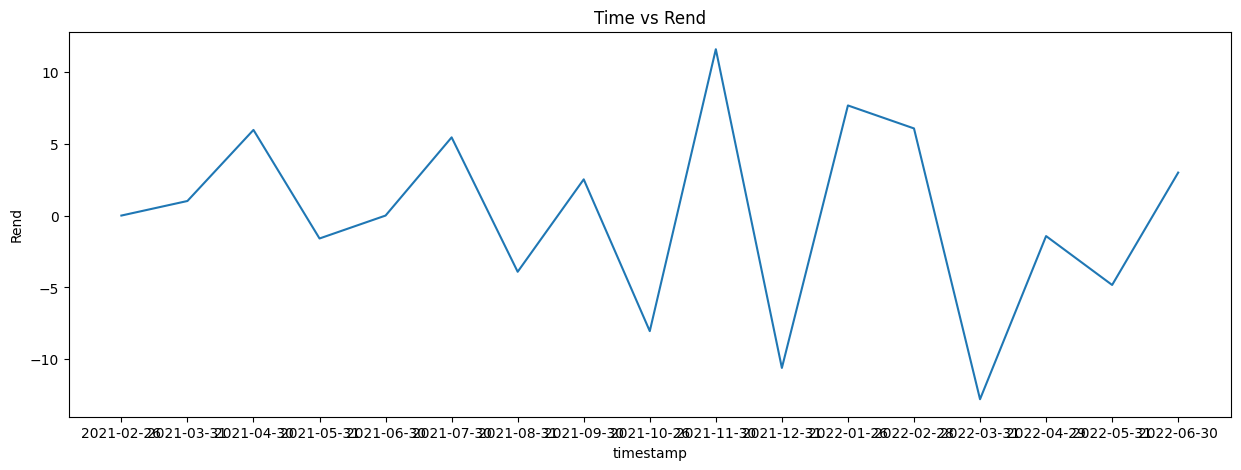

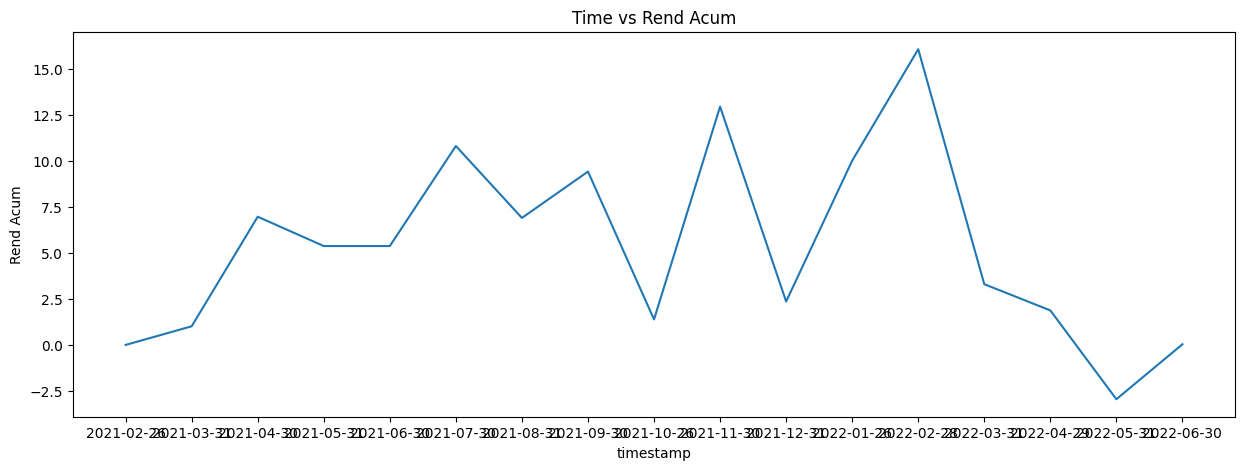

In [20]:
vs.Rend3()
vs.Rend4()

Con los datos obtenidos de la inversión activa podemos observar que hubieron cambios muy bruscos entre algunos meses, había meses de mucho rendimiento y meses de mucha pérdida, en la gráfica del rendimiento acumulado podemos ver que al final del periodo de la inversión quedamos casi en ceros, no hubo pérdida pero fue casi nada el rendimiento de la inversión activa.

Para el histórico de operaciones se creó un DataFrame con nuestras variables que fuimos guardando de Títulos de compra y la de comisiones para reflejar las transacciones que realizamos por mes, al final también agregamos unas columnas que nos fueran regresando la comisión acumulada y títulos totales al final del periodo de nuestra inversión activa.

In [21]:
dt.df_operaciones

,timestamp,titulos_compra,comision,comision_acum,titulos_totales
0,2022-01-31,0.0,0.0000,0.0000,0.0
1,2021-02-26,182.0,14.5243,14.5243,182.0
2,2021-03-31,0.0,0.0000,14.5243,182.0
3,2021-04-30,0.0,0.0000,14.5243,182.0
4,2021-05-31,0.0,0.0000,14.5243,182.0
5,2021-06-30,0.0,0.0000,14.5243,182.0
6,2021-07-30,186.0,16.4529,30.9772,368.0
7,2021-08-31,0.0,0.1028,31.0800,368.0
8,2021-09-30,0.0,1.4939,32.5739,368.0
9,2021-10-26,0.0,0.0000,32.5739,368.0


Hubieron meses en los cuales no se realizó ninguna compra de títulos debido a que no aumentanban en 5% sus percios de un mes a otro, pero aquí podemos observar en total la cantidad de títulos comprados y comisión pagada durante el periodo de inverión.

Por útlimo, recaudando los datos obtenidos de las inversiones pasiva y activa tenemos en un DataFrame la información resumida que es la siguiente.

In [22]:
dt.df_medidas

,medida,descripcion,inv_activa,inv_pasiva
0,rend_m,Rendimiento Promedio Mensual,0.002119,1.130082
1,rend_c,Rendimiento mensual acumulado,0.036028,21.471559
2,sharpe,Sharpe Ratio,-0.651175,-0.671015


Para los rendimientos mensuales solo le sacamos el promedio a los datos de las tablas anteriores de inversiones pasiva y activa, para el rendimiento mensual acumulado fue tomar la última celda de estos DataFrames igualmente y para el sharpe solamente fue aplicar la fórmula ya conocida de Sharpe a los datos que teníamos con nuestros rendimientos.

Si analizamos los datos que nos arroja la tabla podemos ver que la inversión pasiva obtuvo mejores rendimientos tanto mensuales como acumulados al final de los periodos de prueba, aunque podemos observar que tienen radios de Sharpe similares, es interesante ver que aún cuando existe un ratio de Sharpe negativo podemos ver que existieron rendimientos positivos, en teoría se debería de rechazar la inversión por tener riesgo y que no daría rendimientos mayores al de la tasa de referencia, pero en este caso vemos que para la inversión pasiva si existieron buenos rendimientos, en la activa fueron mínimos pero también existió rendimiento.

### 5. Conclusión

Después de revisar las lecturas y realizar el laboratorio con ambos tipos de inversión, pienso que el tipo de inversión que yo realizaría sería la pasiva. Independientemente de los resultados obtenidos del laboratorio que podemos observar que fue una victoria aplastante por parte de la inversión pasiva que tuvo un 21% de rendimiento acumulado durante todo el periodo de prueba, mientras que la inversión activa tuvo solamente un 0.03% de rendimiento al término del periodo de prueba. Claramente existen ventajas y desventajas de cada tipo de inversión, probablemente en el contexto en el que se presentaba este ejercicio beneficiaba mucho más al tipo de inversión pasiva que a la activa.

La inversión pasiva parece ser para el tipo de persona que es más conservadora al momento de invertir su dinero, de igual manera es para mercados que no tienen grandes fluctuaciones como lo pueden ser los mercados emergentes, el tipo de inversión pasiva se beneficia más de portafolios de los cuales sus activos ya son empresas consolidadas y no tienen golpes de mercado tan frecuentemente.

Por otro lado, la inversión activa personalmente lo veo más para ese tipo de mercados donde existe más riesgo, pero de igual forma más rendimientos, el rebalanceo de títulos al final de cada mes puede ser un poco tedioso y hasta muy riesgoso, en el caso de creación de un portafolio eficiente con datos históricos y resulte que entre tu portafolio de treinta y tres activos seleccione siete para distribuir los pesos a los cuales se le va a invertir capital suena muy riesgoso, no estas diversificando tanto el riesgo como lo hicimos en la inversión pasiva. Claro que puede salir bien todo y que dichas empresas tengan rendimientos muy altos, pero de esa misma manera pueden ir perdiendo capital más rápido al no diversificar. 

De la misma manera las inversiones activas son las que mejor se adaptan a los mercados más fluctuantes por el mismo tema del rebalanceo de títulos, si un activo está teniendo un buen desempeño se le aumenta la cantidad de títulos mientras que a los que no dan el rendimiento deseado se les resta la cantidad de títulos que tenían en dicho activo. El rebalanceo sirve amortiguar pérdidas futuras y especular rendimientos, pero existe una comisión por la compra de títulos, estos rebalanceos cuestan dinero al cash y si existen muchos movimientos de títulos o compra, puede llegar a agotar este cash.

En conclusión, observando los resultados del laboratorio podemos concluir que la inversión pasiva, además de ser más sencilla de programar y entender, personalmente me gusta más como inversión que la activa, por ser un poco más conservador y distribuir mejor los pesos del portafolio para diversificar mejor el riesgo. En este caso así resultó y vimos muy buenos rendimientos al respecto y aún así el gasto en comisiones solo se realizó una vez al principio.

Ambas inversiones tienen mejores ámbitos en los que se pueden desarrollar que su contrario, estaría interesante ver en un mercado emergente donde los precios son más fluctuantes y ver si realmente el rebalanceo mensual ayudaría a tener un mejor desempeño en los rendimientos esperados al final del periodo establecido.